In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('raw_data.csv')
data

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [6]:
data.Disease.unique()


array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [184]:
data['Blood Pressure'].unique()


array(['Low', 'Normal', 'High'], dtype=object)

In [185]:
data['Cholesterol Level'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

In [186]:
data['Outcome Variable'].unique()


array(['Positive', 'Negative'], dtype=object)

In [187]:
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [188]:
data.columns


Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [189]:
data['Disease'].value_counts()


Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

In [190]:
from sklearn.preprocessing import LabelEncoder

ferver_encoder = LabelEncoder()
cough_encoder = LabelEncoder()
fatigue_encoder = LabelEncoder()
breathing_encoder = LabelEncoder()
blood_encoder = LabelEncoder()
fat_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
outcome_encoder = LabelEncoder()


In [191]:
data.Fever = ferver_encoder.fit_transform(data.Fever)
data.Cough = cough_encoder.fit_transform(data.Cough)
data.Fatigue = fatigue_encoder.fit_transform(data.Fatigue)
data['Difficulty Breathing'] = breathing_encoder.fit_transform(
    data['Difficulty Breathing'])
data['Blood Pressure'] = blood_encoder.fit_transform(data['Blood Pressure'])
data['Cholesterol Level'] = fat_encoder.fit_transform(
    data['Cholesterol Level'])
data.Gender = gender_encoder.fit_transform(data.Gender)
data['Outcome Variable'] = outcome_encoder.fit_transform(
    data['Outcome Variable'])
data

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,1,2,1
1,Common Cold,0,1,1,0,25,0,2,2,0
2,Eczema,0,1,1,0,25,0,2,2,0
3,Asthma,1,1,0,1,25,1,2,2,1
4,Asthma,1,1,0,1,25,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,1,0,1,0,80,0,0,0,1
345,Stroke,1,0,1,0,85,1,0,0,1
346,Stroke,1,0,1,0,85,1,0,0,1
347,Stroke,1,0,1,0,90,0,0,0,1


In [192]:
# Calculate the frequency of each category in the dataset
category_counts = data['Disease'].value_counts()

# Create a new column with the frequency values for each category
data['Disease_freq'] = data['Disease'].map(category_counts)
data = data.drop(columns='Disease',axis=1)
data


,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_freq
0,1,0,1,1,19,0,1,2,1,8
1,0,1,1,0,25,0,2,2,0,6
2,0,1,1,0,25,0,2,2,0,6
3,1,1,0,1,25,1,2,2,1,23
4,1,1,0,1,25,1,2,2,1,23
...,...,...,...,...,...,...,...,...,...,...
344,1,0,1,0,80,0,0,0,1,16
345,1,0,1,0,85,1,0,0,1,16
346,1,0,1,0,85,1,0,0,1,16
347,1,0,1,0,90,0,0,0,1,16


In [193]:
X = data.drop(columns='Outcome Variable', axis=1)
X


,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Disease_freq
0,1,0,1,1,19,0,1,2,8
1,0,1,1,0,25,0,2,2,6
2,0,1,1,0,25,0,2,2,6
3,1,1,0,1,25,1,2,2,23
4,1,1,0,1,25,1,2,2,23
...,...,...,...,...,...,...,...,...,...
344,1,0,1,0,80,0,0,0,16
345,1,0,1,0,85,1,0,0,16
346,1,0,1,0,85,1,0,0,16
347,1,0,1,0,90,0,0,0,16


In [194]:
y = data[['Outcome Variable']].values.ravel()
y


array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

while True:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=45)

    # Initialize the Random Forest classifier
    clf = RandomForestClassifier()

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Calculate the accuracy of the model on the test data
    accuracy = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    print('Current accuracy:', accuracy)

    # Check if the accuracy is greater than 0.9
    if accuracy > 0.91:
        break


Current accuracy: 0.8857142857142857
Current accuracy: 0.8857142857142857
Current accuracy: 0.8857142857142857
Current accuracy: 0.9142857142857143


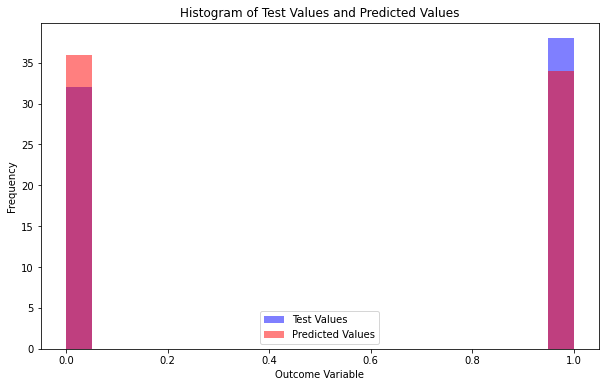

In [196]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(y_test, alpha=0.5, label='Test Values', bins=20, color='blue')
plt.hist(y_pred, alpha=0.5, label='Predicted Values', bins=20, color='red')

plt.xlabel('Outcome Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Test Values and Predicted Values')
plt.legend()
plt.show()


In [197]:
import pickle


# Export the model and label encoder using pickle
with open('./model/prediction.pkl', 'wb') as file:
    pickle.dump((clf, ferver_encoder,
                 cough_encoder,
                 fatigue_encoder,
                 breathing_encoder,
                 blood_encoder,
                 fat_encoder,
                 gender_encoder,
                 outcome_encoder,
                 category_counts), file)
